## 타이타닉 생존자 예측


In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# (1) 라이브러리 & 데이터 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
gender = pd.read_csv('./gender_submission.csv')


In [13]:
test.shape, train.shape, gender.shape


((418, 11), (891, 12), (418, 2))

In [14]:
display(test.head())
display(train.head())
# display(gender.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# (2) EDA=> 어떻게 Feature Engineering 진행할 것인가에 대한 힌트를 얻기. (파생컬럼, 컬럼 제거 등)
display(test.info())
display(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [19]:
display(train.describe())
display(test.describe())


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
display(train[train['Fare'] == 0])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
# train null:age, cabin,embarked
# test null: age, fare cabin

In [23]:
# 시각화
# 생존확률에 영향을 주는 요소?

# 각 컬럼에 따른 생존율?
survived = train[train['Survived'] == 1]['Pclass'].value_counts()
dead = train[train['Survived'] == 0]['Pclass'].value_counts()
# 표로 만들기
pd.DataFrame({'Survived': survived, 'Dead': dead})



,Survived,Dead
Pclass,,
1,136,80
2,87,97
3,119,372


In [29]:
# 시각화
# 생존확률에 영향을 주는 요소?

# 각 컬럼에 따른 생존율?
def show_bar(column):
    survived = train[train['Survived'] == 1][column].value_counts()
    dead = train[train['Survived'] == 0][column].value_counts()
    # 표로 만들기
    merged_df = pd.DataFrame({'Survived': survived, 'Dead': dead})
    merged_df.plot(kind='bar', stacked=True, figsize=(6,3))



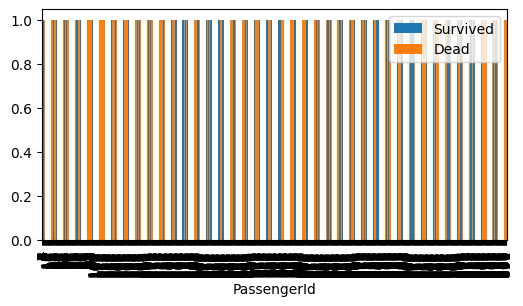

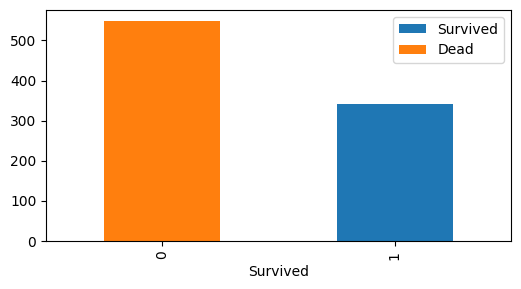

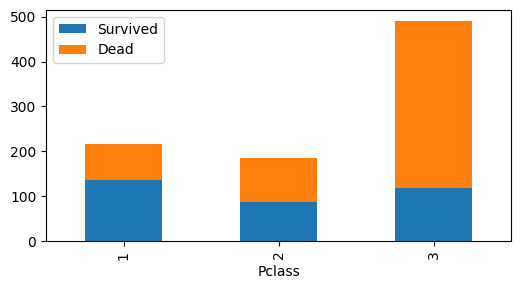

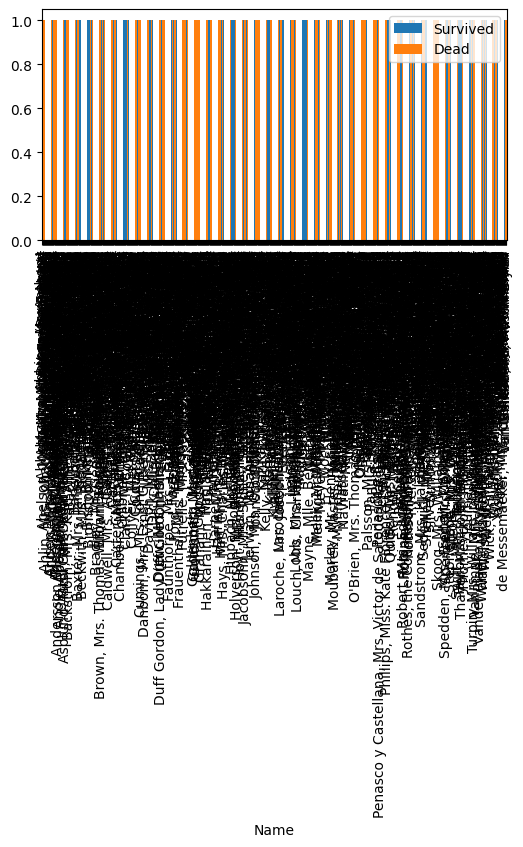

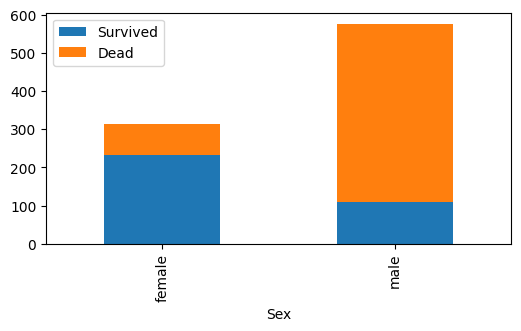

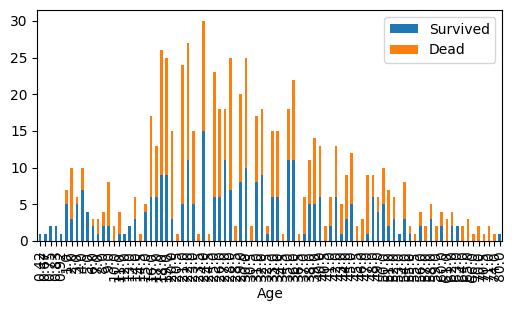

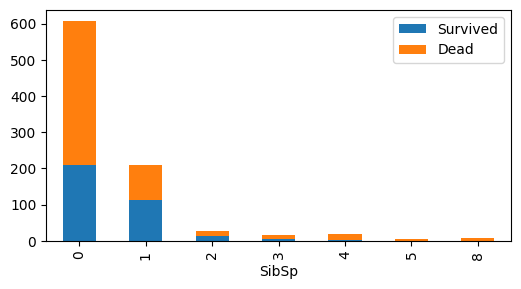

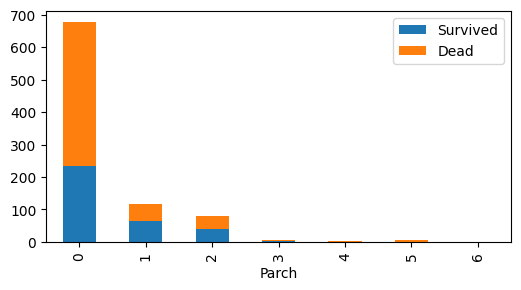

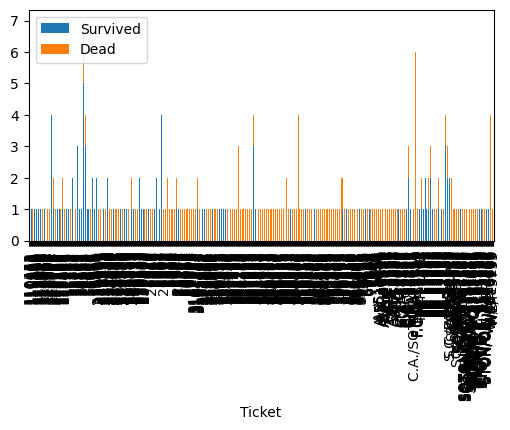

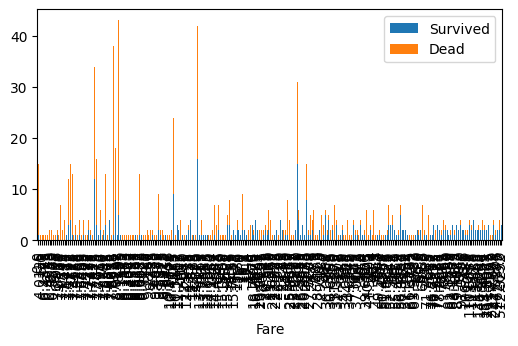

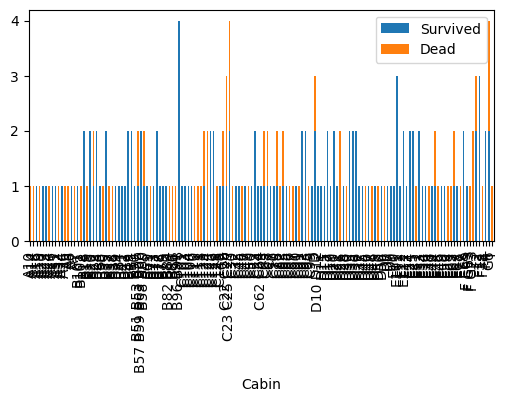

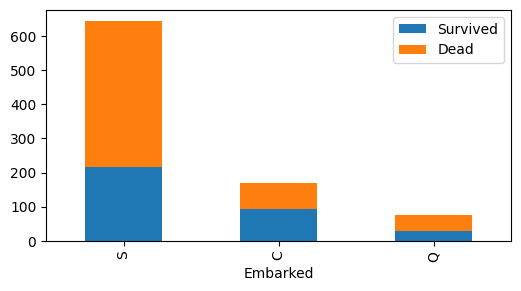

In [31]:
for column in train.columns:
    show_bar(column)

In [33]:
condition = (train['Fare'] == 0) & (train['Pclass'] == 1)
train[condition]

train['Fare'].sort_values().head(10)
train['Fare'].sort_values(ascending=False).head(10)

train.sort_values(by='Fare')['Survived'].head(10).mean() # 10%
train.sort_values(by='Fare', ascending=False)['Survived'].head(10).mean() #70%


# train['Fare'].unique() # 구간을 어떻게 나눌 것인가 



array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [39]:
# 나이의 영향 => 고령자 기준을 어떻게할 것인가

train['Survived'].mean() # 38%
# train[train['Age'] >= 65]['Survived'].mean() #
train[train['Age'] <= 5]['Survived'].mean() # 70%

# # 성별의 영향
# train[train['Sex'] == 'female']['Survived'].mean() 
# train[train['Sex'] == 'male']['Survived'].mean() 


np.float64(0.7045454545454546)

In [47]:
#(3) Feature Enginerring 진행 =>필요없는 컬럼 제거, 파생컬럼 생성, 데이터를 범주형으로 변경 등
# 기계가 맛있는 데이터 변경 (숫자)

# (1) Name => 이름 안에있는 Title은 왠지 나이나 상황을 나타내지 않을까?
train['Name_Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
# show_bar('Name_Title')
train['Name_Title'].value_counts()


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/py/91q9ql1j6412wg5tjn0xry080000gn/T/ipykernel_36817/1868782528.py:5: SyntaxWarning: invalid escape sequence '\.'
  train['Name_Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')


Name_Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [52]:
title_mapping = {
    "Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3
}
# train['Name_Title'].map(title_mapping).value_counts(dropna=False)
train['Name_Title_Num'] = train['Name_Title'].map(title_mapping).fillna(3)
train



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Title_Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0.0


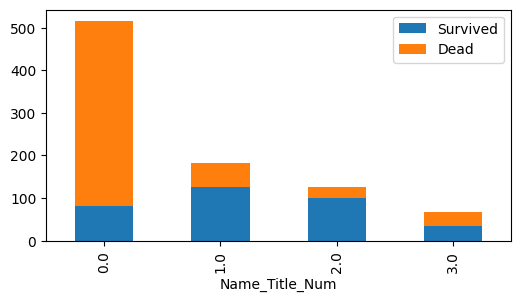

In [53]:
show_bar('Name_Title_Num')

In [54]:
test['Name_Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')
test['Name_Title_Num'] = test['Name_Title'].map(title_mapping).fillna(3)
test


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/py/91q9ql1j6412wg5tjn0xry080000gn/T/ipykernel_36817/3381250378.py:1: SyntaxWarning: invalid escape sequence '\.'
  test['Name_Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Title_Num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,3.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,0.0


In [55]:
#(2) sex => male, female => 0, 1

sex_mapping = {
    "male":0, "female":1
}
train['Sex_Num'] = train['Sex'].map(sex_mapping)
test['Sex_Num'] = test['Sex'].map(sex_mapping)


In [59]:
# (3) Age => Name_Title 별 평균 나이 => 타이틀 기반으로 나이를 넣어주기
train.groupby('Name_Title')['Age'].mean()

train['Age'] = train['Age'].fillna(train.groupby('Name_Title')['Age'].transform('mean'))
test['Age'] = test['Age'].fillna(test.groupby('Name_Title')['Age'].transform('mean'))

train['Age'].isnull().sum(), test['Age'].isnull().sum()



(np.int64(0), np.int64(1))

In [61]:
 # test에 결측이 하나 있어서(해당 데이터확인 후)
test['Age'].fillna(28, inplace=True)
test['Age'].isnull().sum()

/var/folders/py/91q9ql1j6412wg5tjn0xry080000gn/T/ipykernel_36817/2377545184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(28, inplace=True)


np.int64(0)

<Axes: xlabel='Age', ylabel='Density'>

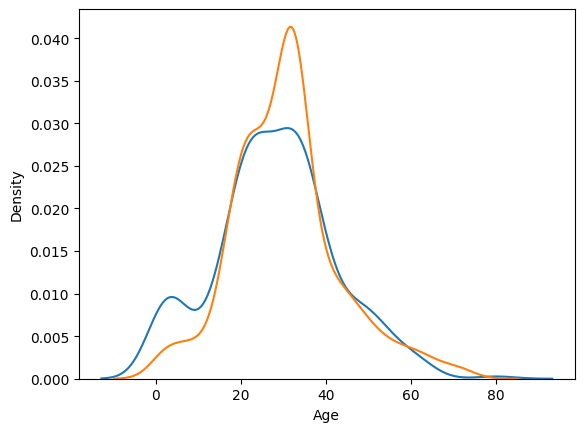

In [78]:
# 나이 구간을 어떤 기준으로 나누면 좋을까?
# plt.hist(train['Age'], bins=10, edgecolor='black')  # 20~40에 나이가 몰려있음

# train[train['Survived'] == 1]
sns.kdeplot(data=train[train['Survived'] == 1], x='Age', label='Survived')
sns.kdeplot(data=train[train['Survived'] == 0], x='Age', label='Dead')
# 생존자 중 나이가 높은 사람이 많음
# 나이가 높을수록 생존할 확률이 높은 것 같음


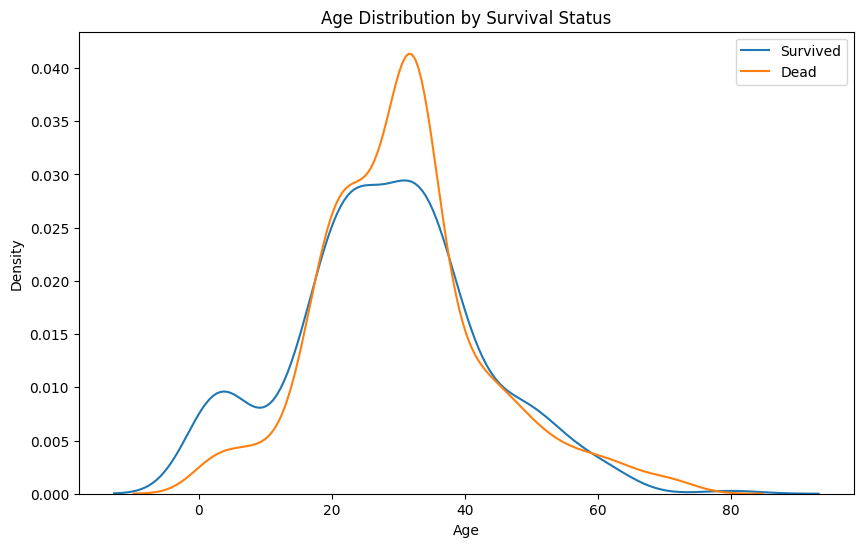

In [70]:
# Create separate figure
plt.figure(figsize=(10, 6))

# Plot KDE for both survived and not survived
sns.kdeplot(data=train[train['Survived'] == 1], x='Age', label='Survived')
sns.kdeplot(data=train[train['Survived'] == 0], x='Age', label='Dead')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [73]:
age_bins = [0, 18, 25, 40, np.inf]
age_lables = [0, 1, 2, 3]

train['Age_Num'] = pd.cut(train['Age'], bins=age_bins, labels=age_lables)
test['Age_Num'] = pd.cut(test['Age'], bins=age_bins, labels=age_lables)

# train['Age_bin'].value_counts()
# test['Age_bin'].value_counts()


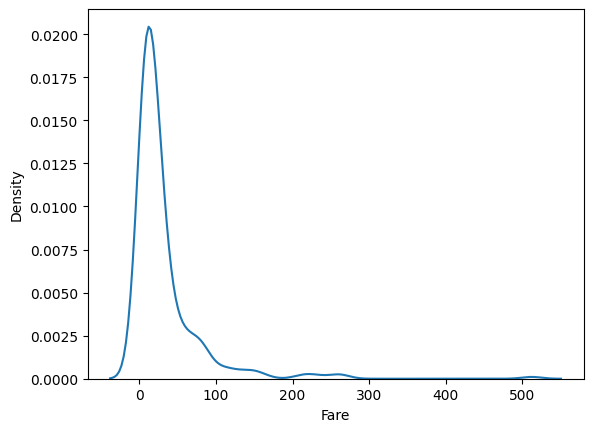

In [84]:
# Fare, Embarked
train['Fare'].value_counts().sort_index()
sns.kdeplot(data=train, x='Fare', label='Survived')

fare_bins = [0, 20, 100, np.inf]
fare_labels = [0, 1, 2]

train['Fare_Num'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels)
test['Fare_Num'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels)

# train['Embarked'].value_counts()


In [87]:
# Embarked
train['Embarked'].isnull().sum()
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace=True)
train['Embarked'].isnull().sum()


np.int64(0)

In [89]:
embarked_mapping = {
    "S":0, "C":1, "Q":2
}
train['Embarked_Num'] = train['Embarked'].map(embarked_mapping)
test['Embarked_Num'] = test['Embarked'].map(embarked_mapping)


In [94]:
drop_features = ['PassengerId', 'Name', 'Sex', 'Age', 'Fare', 'Ticket', 'Cabin', 'Embarked', 'Name_Title']
df_train = train.drop(drop_features, axis=1)

In [96]:
drop_features = ['PassengerId', 'Name', 'Sex', 'Age', 'Fare', 'Ticket', 'Cabin', 'Embarked', 'Name_Title']
df_test = test.drop(drop_features, axis=1)

In [102]:

df_train['Fare_Num'].fillna(0, inplace=True)
df_test['Fare_Num'].fillna(0, inplace=True)


/var/folders/py/91q9ql1j6412wg5tjn0xry080000gn/T/ipykernel_36817/1432494378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare_Num'].fillna(0, inplace=True)


In [103]:
df_train.isnull().sum(), df_test.isnull().sum()



(Survived          0
 Pclass            0
 SibSp             0
 Parch             0
 Name_Title_Num    0
 Sex_Num           0
 Age_Num           0
 Fare_Num          0
 Embarked_Num      0
 dtype: int64,
 Pclass            0
 SibSp             0
 Parch             0
 Name_Title_Num    0
 Sex_Num           0
 Age_Num           0
 Fare_Num          0
 Embarked_Num      0
 dtype: int64)

In [104]:
# (4) Modeling 진행
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [105]:
# 데이터 수가 적을 때는 KFold 방식
from sklearn.model_selection import KFold, cross_val_score

# 데이터 수가 많을 때는 StratifiedKFold 방식
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [106]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
k_fold

KFold(n_splits=10, random_state=123, shuffle=True)

In [111]:
# (5) 실험들을 통해 최적의 모델 찾기  => MLFlow 사용
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('titanic_classification')

<Experiment: artifact_location='mlflow-artifacts:/671898106966398917', creation_time=1731987762174, experiment_id='671898106966398917', last_update_time=1731987762174, lifecycle_stage='active', name='titanic_classification', tags={}>

In [109]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(n_neighbors=10),
    "RandomForest": RandomForestClassifier(n_estimators=10),
    "GaussianNB": GaussianNB(),
    "SVC": SVC()
}

In [113]:
mlflow.autolog()
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        score = cross_val_score(
            model, 
            df_train.drop(columns=['Survived']),  # data 
            df_train['Survived'],   # label data
            cv=k_fold, 
            scoring='accuracy'
        )
        print(f"{model_name}의 정확도는: {np.mean(score)*100}")


# DecisionTree 모델 선택 => 튜닝 진행



2024/11/19 14:07:18 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/11/19 14:07:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/19 14:07:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) t

DecisionTree의 정확도는: 77.5505617977528


2024/11/19 14:07:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:07:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

KNeighbors의 정확도는: 81.69787765293384


2024/11/19 14:07:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:07:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

RandomForest의 정확도는: 78.89388264669164


2024/11/19 14:08:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:08:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

GaussianNB의 정확도는: 80.4681647940075


2024/11/19 14:08:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:08:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

SVC의 정확도는: 83.16104868913857


In [119]:
def hyper_param_tunning(depth, split, alpha):
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, ccp_alpha=alpha)

    scores = cross_val_score(
        dt_clf, 
        df_train.drop(columns=['Survived']), 
        df_train['Survived'], 
        cv=k_fold, 
        scoring='accuracy'
    )
    print(f"depth: {depth}, split: {split}, alpha: {alpha}, score: {np.mean(scores)*100}")


2024/11/19 14:19:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '75aca3bea0db43528cad463396cd51eb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/19 14:19:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handli

depth: 1, split: 2, alpha: 0.0, score: 78.22721598002497


2024/11/19 14:19:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:19:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run unique-ape-742 at: http://127.0.0.1:5000/#/

depth: 1, split: 2, alpha: 0.1, score: 78.22721598002497


2024/11/19 14:19:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:19:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-fox-327 at: http://127.0.0.1:5000

depth: 1, split: 2, alpha: 0.2, score: 61.60799001248438


2024/11/19 14:20:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:20:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run entertaining-roo-359 at: http://127.0.0.1:5

depth: 1, split: 2, alpha: 0.3, score: 61.60799001248438


2024/11/19 14:20:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run unruly-doe-547 at: http://127.0.0.1:5000/#/

depth: 1, split: 2, alpha: 0.4, score: 61.60799001248438


2024/11/19 14:20:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:20:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-turtle-881 at: http://127.0.0.1:50

depth: 1, split: 3, alpha: 0.0, score: 78.22721598002497


2024/11/19 14:20:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:20:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run merciful-sow-39 at: http://127.0.0.1:5000/#

depth: 1, split: 3, alpha: 0.1, score: 78.22721598002497


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024/11/19 14:21:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare 

depth: 1, split: 3, alpha: 0.2, score: 61.60799001248438


2024/11/19 14:21:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 3, alpha: 0.3, score: 61.60799001248438


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024/11/19 14:21:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare 

depth: 1, split: 3, alpha: 0.4, score: 61.60799001248438


2024/11/19 14:21:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:21:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run enchanting-vole-565 at: http://127.0.0.1:50

depth: 1, split: 4, alpha: 0.0, score: 78.22721598002497


2024/11/19 14:22:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:22:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 1, split: 4, alpha: 0.1, score: 78.22721598002497


2024/11/19 14:22:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 4, alpha: 0.2, score: 61.60799001248438


2024/11/19 14:22:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 4, alpha: 0.3, score: 61.60799001248438


2024/11/19 14:23:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 4, alpha: 0.4, score: 61.60799001248438


2024/11/19 14:23:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:23:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 1, split: 5, alpha: 0.0, score: 78.22721598002497


2024/11/19 14:24:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:24:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 1, split: 5, alpha: 0.1, score: 78.22721598002497


2024/11/19 14:24:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 5, alpha: 0.2, score: 61.60799001248438


2024/11/19 14:25:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 5, alpha: 0.3, score: 61.60799001248438


2024/11/19 14:25:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 1, split: 5, alpha: 0.4, score: 61.60799001248438


2024/11/19 14:25:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:25:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 2, split: 2, alpha: 0.0, score: 77.103620474407


2024/11/19 14:26:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:26:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 2, split: 2, alpha: 0.1, score: 78.22721598002497


2024/11/19 14:26:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 2, split: 2, alpha: 0.2, score: 61.60799001248438


2024/11/19 14:26:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 2, split: 2, alpha: 0.3, score: 61.60799001248438


2024/11/19 14:27:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: 

depth: 2, split: 2, alpha: 0.4, score: 61.60799001248438


2024/11/19 14:27:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:27:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

depth: 2, split: 3, alpha: 0.0, score: 77.103620474407


2024/11/19 14:28:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/19 14:28:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Library/Framework

KeyboardInterrupt: 

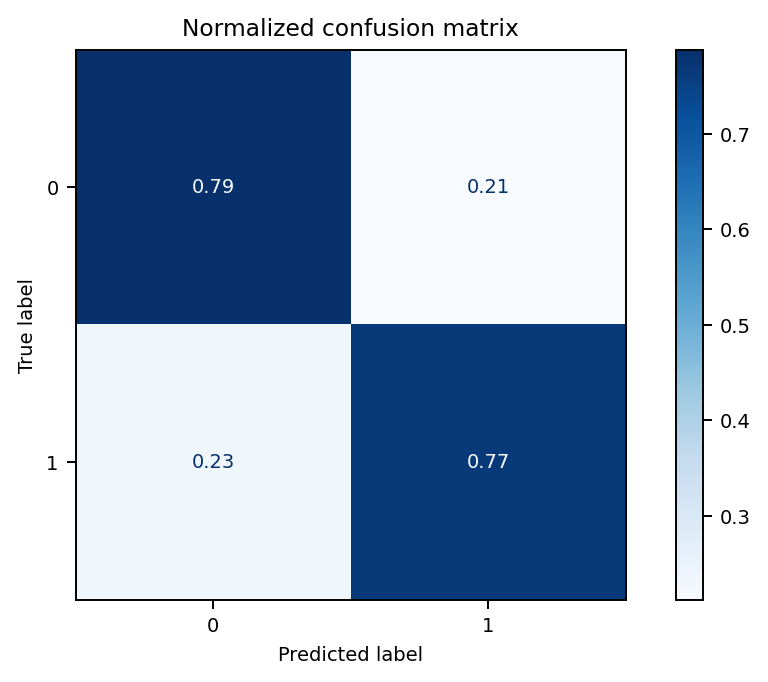

In [120]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
min_samples_split = [2, 3, 4, 5]
ccp_alpha = [0.0, 0.1, 0.2, 0.3, 0.4]

for depth in max_depth:
    for split in min_samples_split:
        for alpha in ccp_alpha:
            hyper_param_tunning(depth, split, alpha)


In [121]:
# (6) test 파일을 모델을 통해 예측한 다음(mlflow 사용) => kaggle 제출
# http://127.0.0.1:5000/#/experiments/671898106966398917/runs/cd7e3c6c271b4def918adca9867b8b3b

load_model = 'runs:/cd7e3c6c271b4def918adca9867b8b3b/model'  # model uri

loaded_model = mlflow.pyfunc.load_model(load_model)
loaded_model
# loaded_model.predict(df_test)



mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: cd7e3c6c271b4def918adca9867b8b3b

In [126]:
df_test['Fare_Num'] = df_test['Fare_Num'].astype(np.int64)
df_test['Age_Num'] = df_test['Age_Num'].astype(np.int64)

# loaded_model.predict(df_test)



In [128]:
pred = loaded_model.predict(df_test)


In [133]:
df_result = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred
})
df_result.to_csv('./submission.csv', index=False)